In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import pylab

In [58]:
#import data
df = pd.read_csv('MLF_GP1_CreditScore.csv')
#splitting the target variable from the others
X = df.iloc[:, 0:-2]
y = df.iloc[: ,-2]
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 1700 x 28
   Sales/Revenues  Gross Margin    EBITDA  EBITDA Margin  \
0       -0.005496      0.030763  0.018885       0.024515   
1       -0.005496      0.030763  0.088716       0.094733   
2       -0.007045      0.023159  0.088716       0.096440   
3       -0.009396      0.028400  0.088716       0.099046   
4       -0.009009      0.027714  0.088716       0.098611   

   Net Income Before Extras  Total Debt  Net Debt   LT Debt   ST Debt  \
0                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
1                  0.146849   -0.029710 -0.019296 -0.042648  0.049875   
2                  0.108590    0.039410  0.034268  0.009059  0.250371   
3                  0.146137    0.030071  0.036938 -0.016964  0.356994   
4                  0.123500    0.024224  0.034445 -0.034132  0.461894   

       Cash  ...  Interest Coverage  Total Liquidity  Current Liquidity  \
0 -0.133716  ...           0.136748         0.392143          -0.184887   
1 -0.133716  ...           

In [49]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
print(df.iloc[0].dtypes)
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
dtype: object
float64
Total 

In [7]:
print("Number of missing values in each column")
print(df.isnull().sum())

Number of missing values in each column
Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
dtype: int64


In [8]:
#some statistical analysis of the data set
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


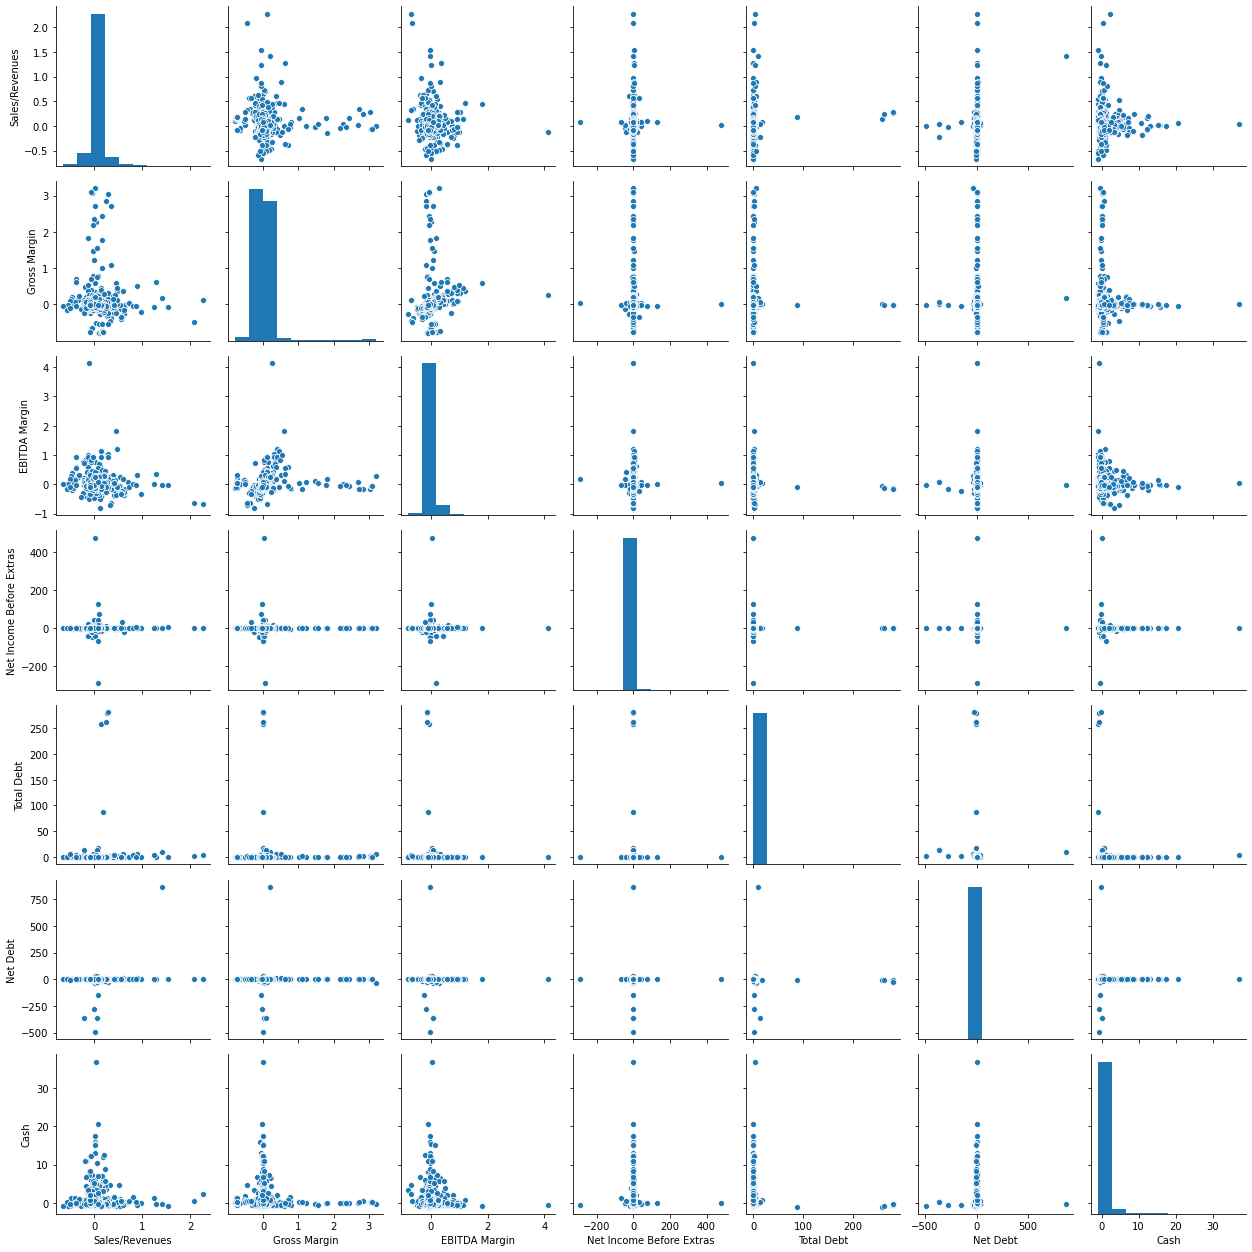

In [11]:
cols = ['Sales/Revenues','Gross Margin','EBITDA Margin','Net Income Before Extras', 'Total Debt', 'Net Debt', 'Cash']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

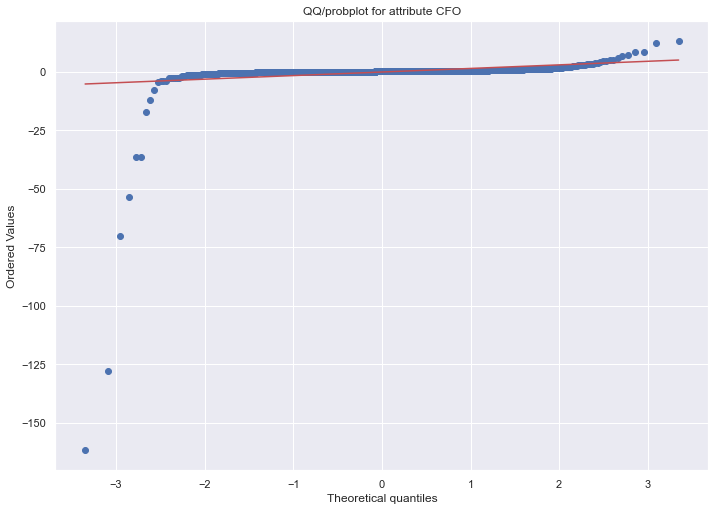

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['CFO'], dist="norm", plot=pylab)
ax.set_title("QQ/probplot for attribute CFO")
pylab.show()

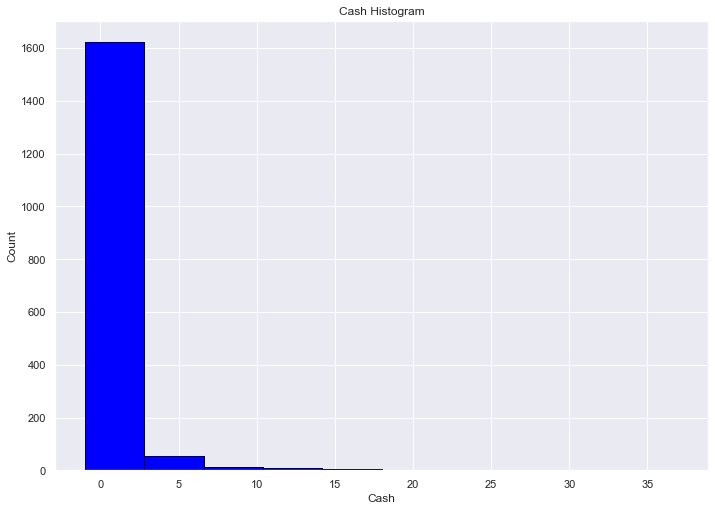

In [50]:
plt.hist(df['Cash'],color='blue',ec='black')
plt.title('Cash Histogram')
plt.xlabel('Cash')
plt.ylabel('Count')
plt.show()

In [19]:
#standardizing the data for the boxplot
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

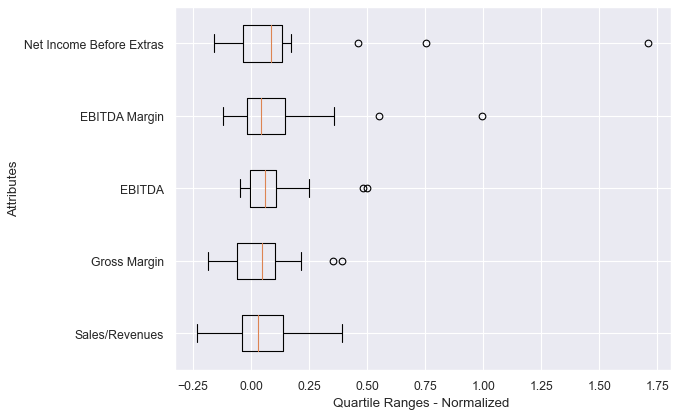

<Figure size 2880x7200 with 0 Axes>

In [56]:
columnsNamesArr = df.columns.values
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(X[0:5],labels=columnsNamesArr[0:5],vert=False)
plt.ylabel("Attributes")
plt.xlabel("Quartile Ranges - Normalized ")
plt.figure(figsize=(40,100))
plt.show()

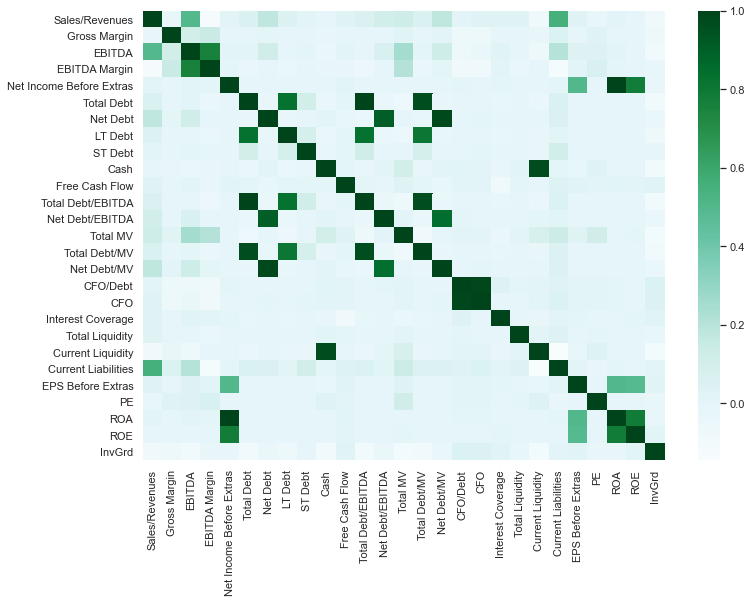

In [53]:
columnsNamesArr = df.columns.values
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,cmap='BuGn',cbar=True,xticklabels=columnsNamesArr,yticklabels=columnsNamesArr)
sns.set(rc={'figure.figsize':(11.7,8.27)})